In [1]:
import sys
sys.path.append('../')

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

from src.data.utils import read_image
from src.data.convolution import convolve

# 0 GT images

### 1 BSDS300

In [2]:
images = list(Path('../datasets/gt/BSDS300').rglob('*.jpg'))
print(f'Total: {len(images)} images in BSDS300')

Total: 300 images in BSDS300


<Figure size 640x480 with 0 Axes>

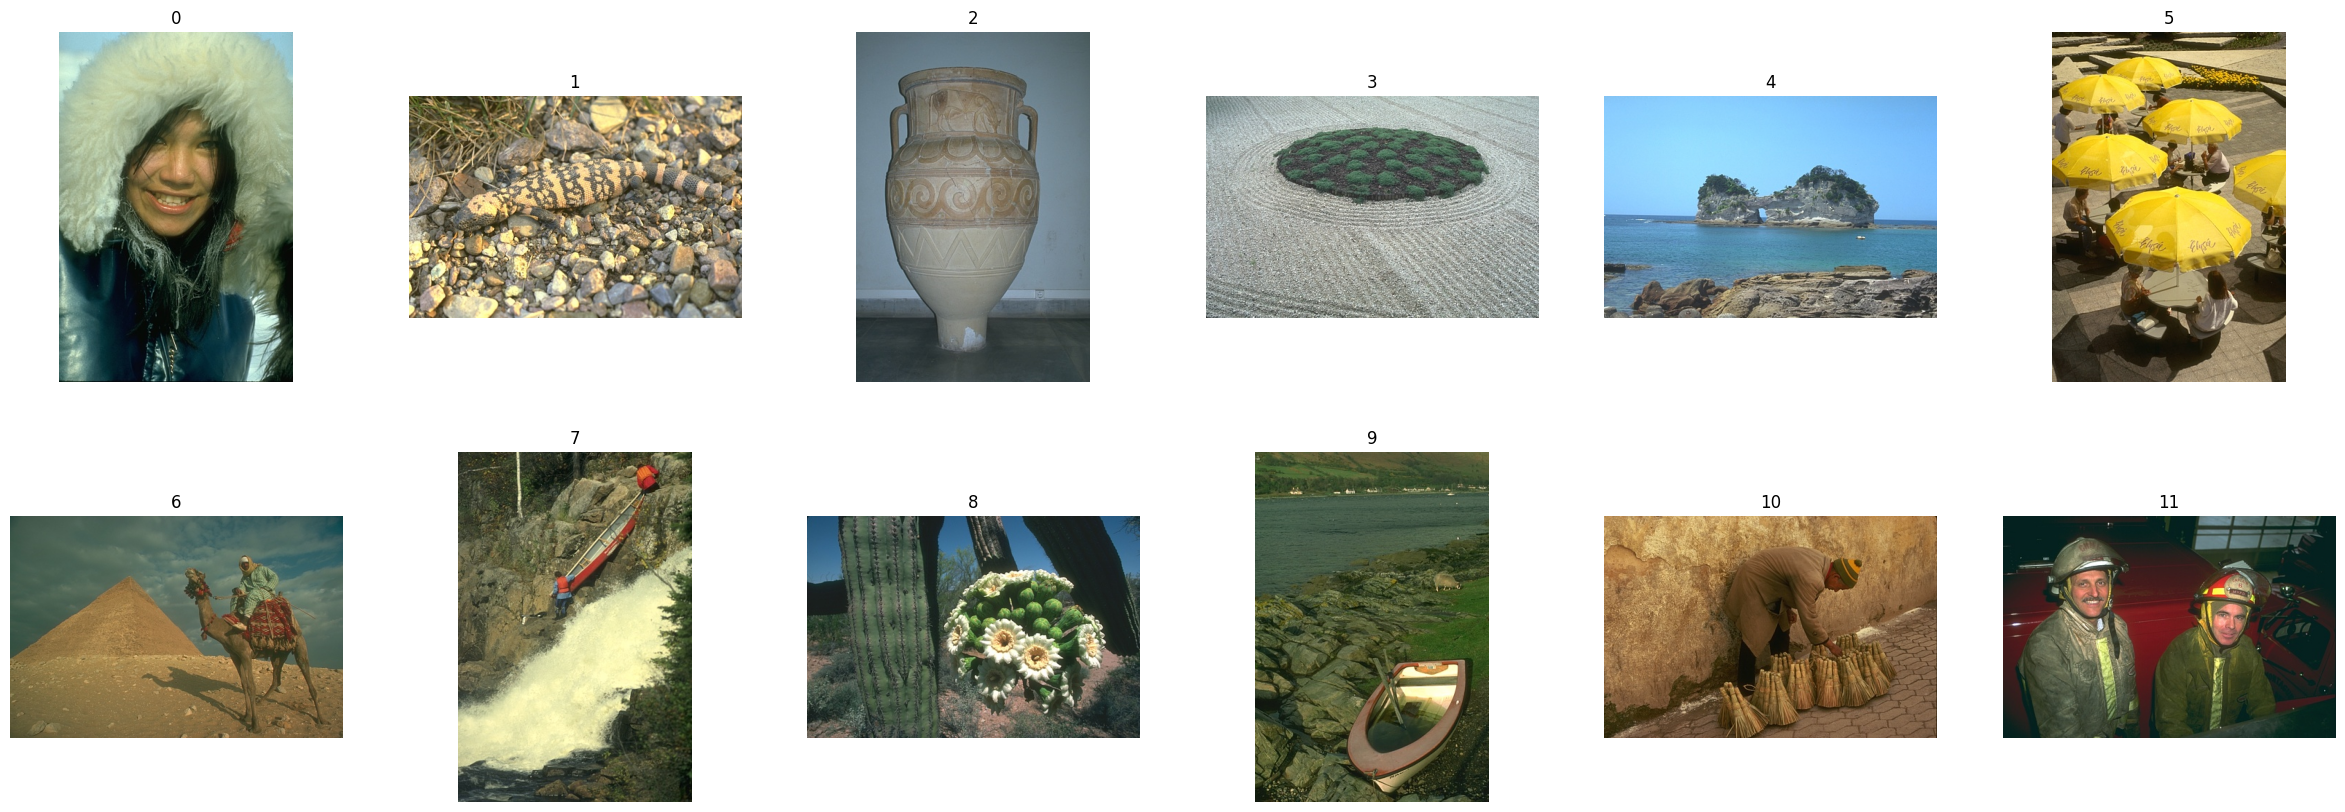

In [3]:
n = 12
img_in_row = 6

plt.gray()
fig, axs = plt.subplots(n // img_in_row, img_in_row, figsize=(5 * img_in_row, 5 * n // img_in_row))
for i in range(n // img_in_row):
    for j in range(img_in_row):
        image = read_image(images[i * img_in_row + j])
        axs[i, j].imshow(image)
        axs[i, j].axis('off')
        axs[i, j].set_title(str(i * img_in_row + j))

### 2 Sun

In [4]:
images = list(Path('../datasets/gt/Sun-gray').rglob('*.png'))
print(f'Total: {len(images)} images in Sun')

Total: 80 images in Sun


<Figure size 640x480 with 0 Axes>

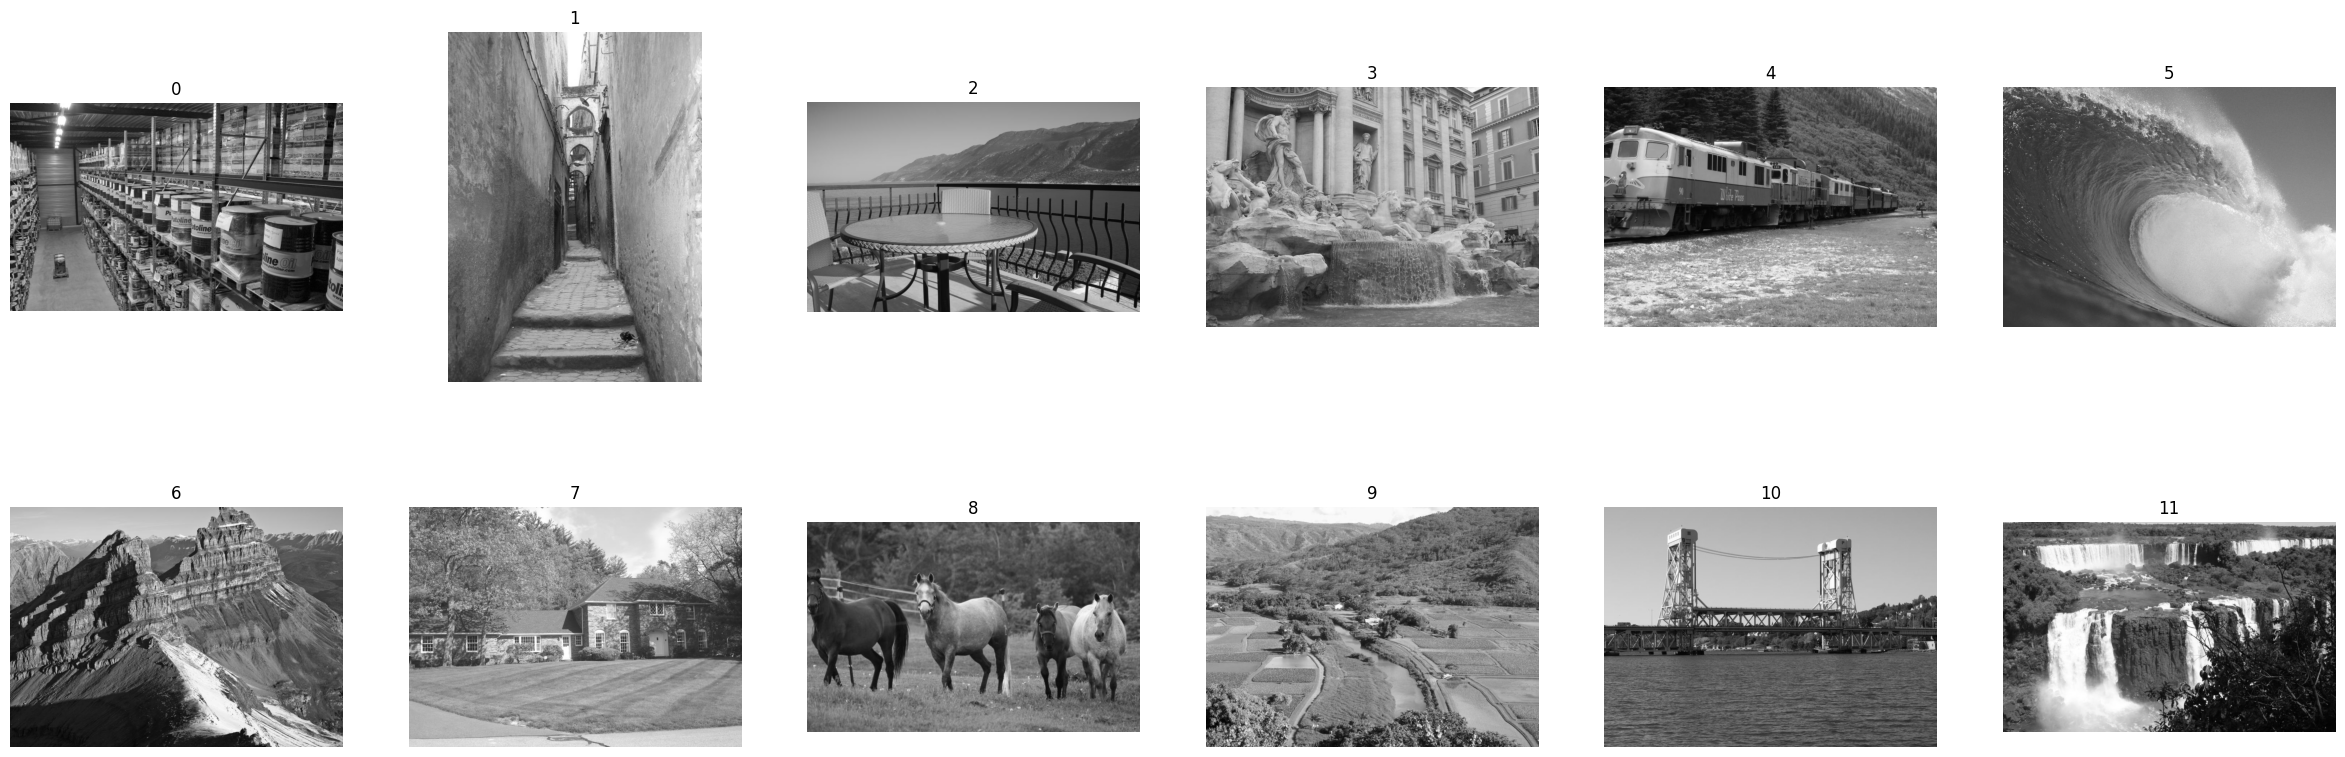

In [5]:
n = 12
img_in_row = 6

plt.gray()
fig, axs = plt.subplots(n // img_in_row, img_in_row, figsize=(5 * img_in_row, 5 * n // img_in_row))
for i in range(n // img_in_row):
    for j in range(img_in_row):
        image = read_image(images[i * img_in_row + j])
        axs[i, j].imshow(image)
        axs[i, j].axis('off')
        axs[i, j].set_title(str(i * img_in_row + j))

# 1 Motion blur

In [6]:
total_cnt = 0

### Levin

In [7]:
files = list(Path('../datasets/kernels/motion-blur/processed/Levin').rglob('*.npy'))

<Figure size 640x480 with 0 Axes>

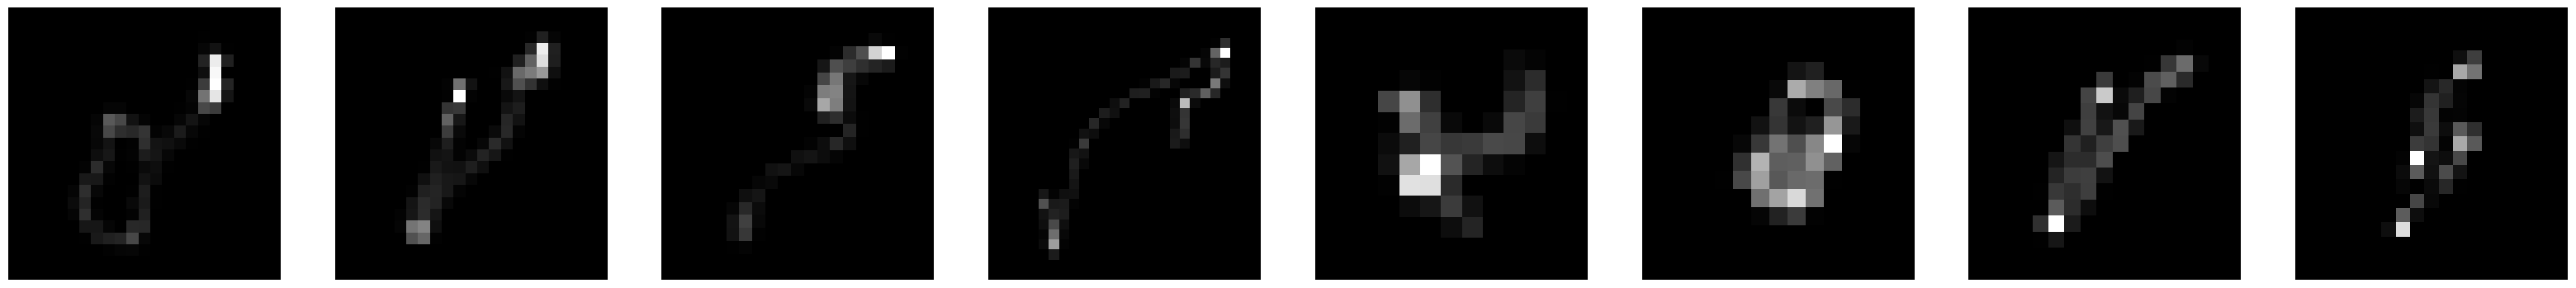

In [8]:
n = len(files)
total_cnt += n

plt.gray()
fig, axs = plt.subplots(1, n, figsize=(n * 5, 5))
for i in range(n):
    psf = np.load(str(files[i]), allow_pickle=True).item()['psf']
    axs[i].imshow(psf)
    axs[i].axis('off')

Example of blurred image:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


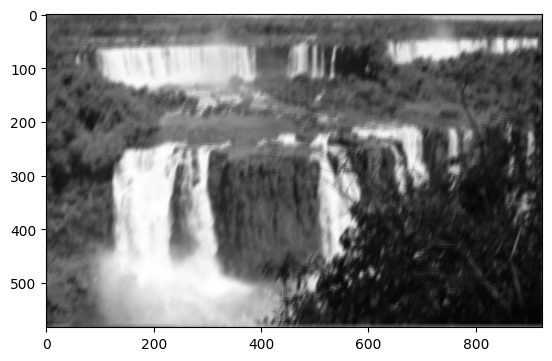

In [9]:
blurred = convolve(image, psf)
plt.imshow(blurred)
plt.show()

In [10]:
psf.shape

(19, 19)

### Sun

In [11]:
files = list(Path('../datasets/kernels/motion-blur/processed/Sun').rglob('*.npy'))

<Figure size 640x480 with 0 Axes>

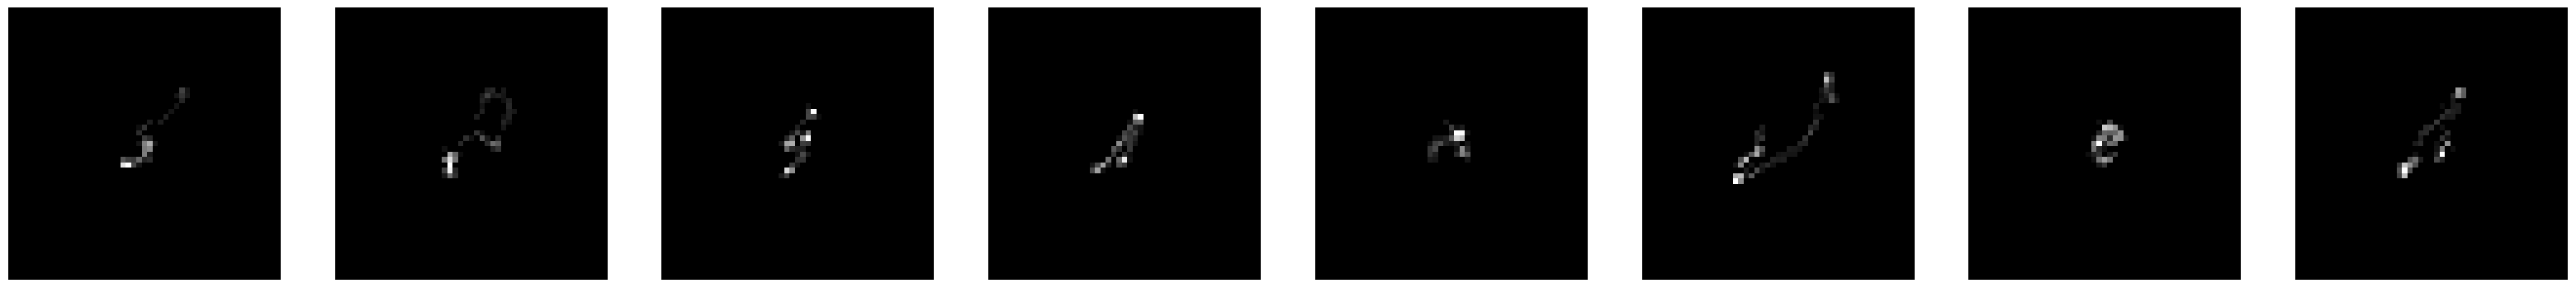

In [12]:
n = len(files)
total_cnt += n

plt.gray()
fig, axs = plt.subplots(1, n, figsize=(n * 5, 5))
for i in range(n):
    psf = np.load(str(files[i]), allow_pickle=True).item()['psf']
    axs[i].imshow(psf)
    axs[i].axis('off')

In [13]:
psf.shape

(51, 51)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


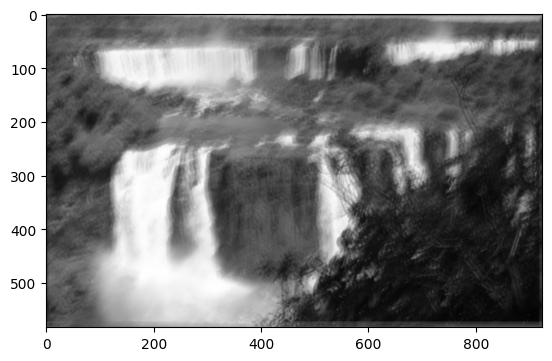

In [14]:
blurred = convolve(image, psf)
plt.imshow(blurred)
plt.show()

### Synthetic (generated by us)

In [15]:
files = list(Path('../datasets/kernels/motion-blur/processed/synthetic').rglob('*.npy'))

<Figure size 640x480 with 0 Axes>

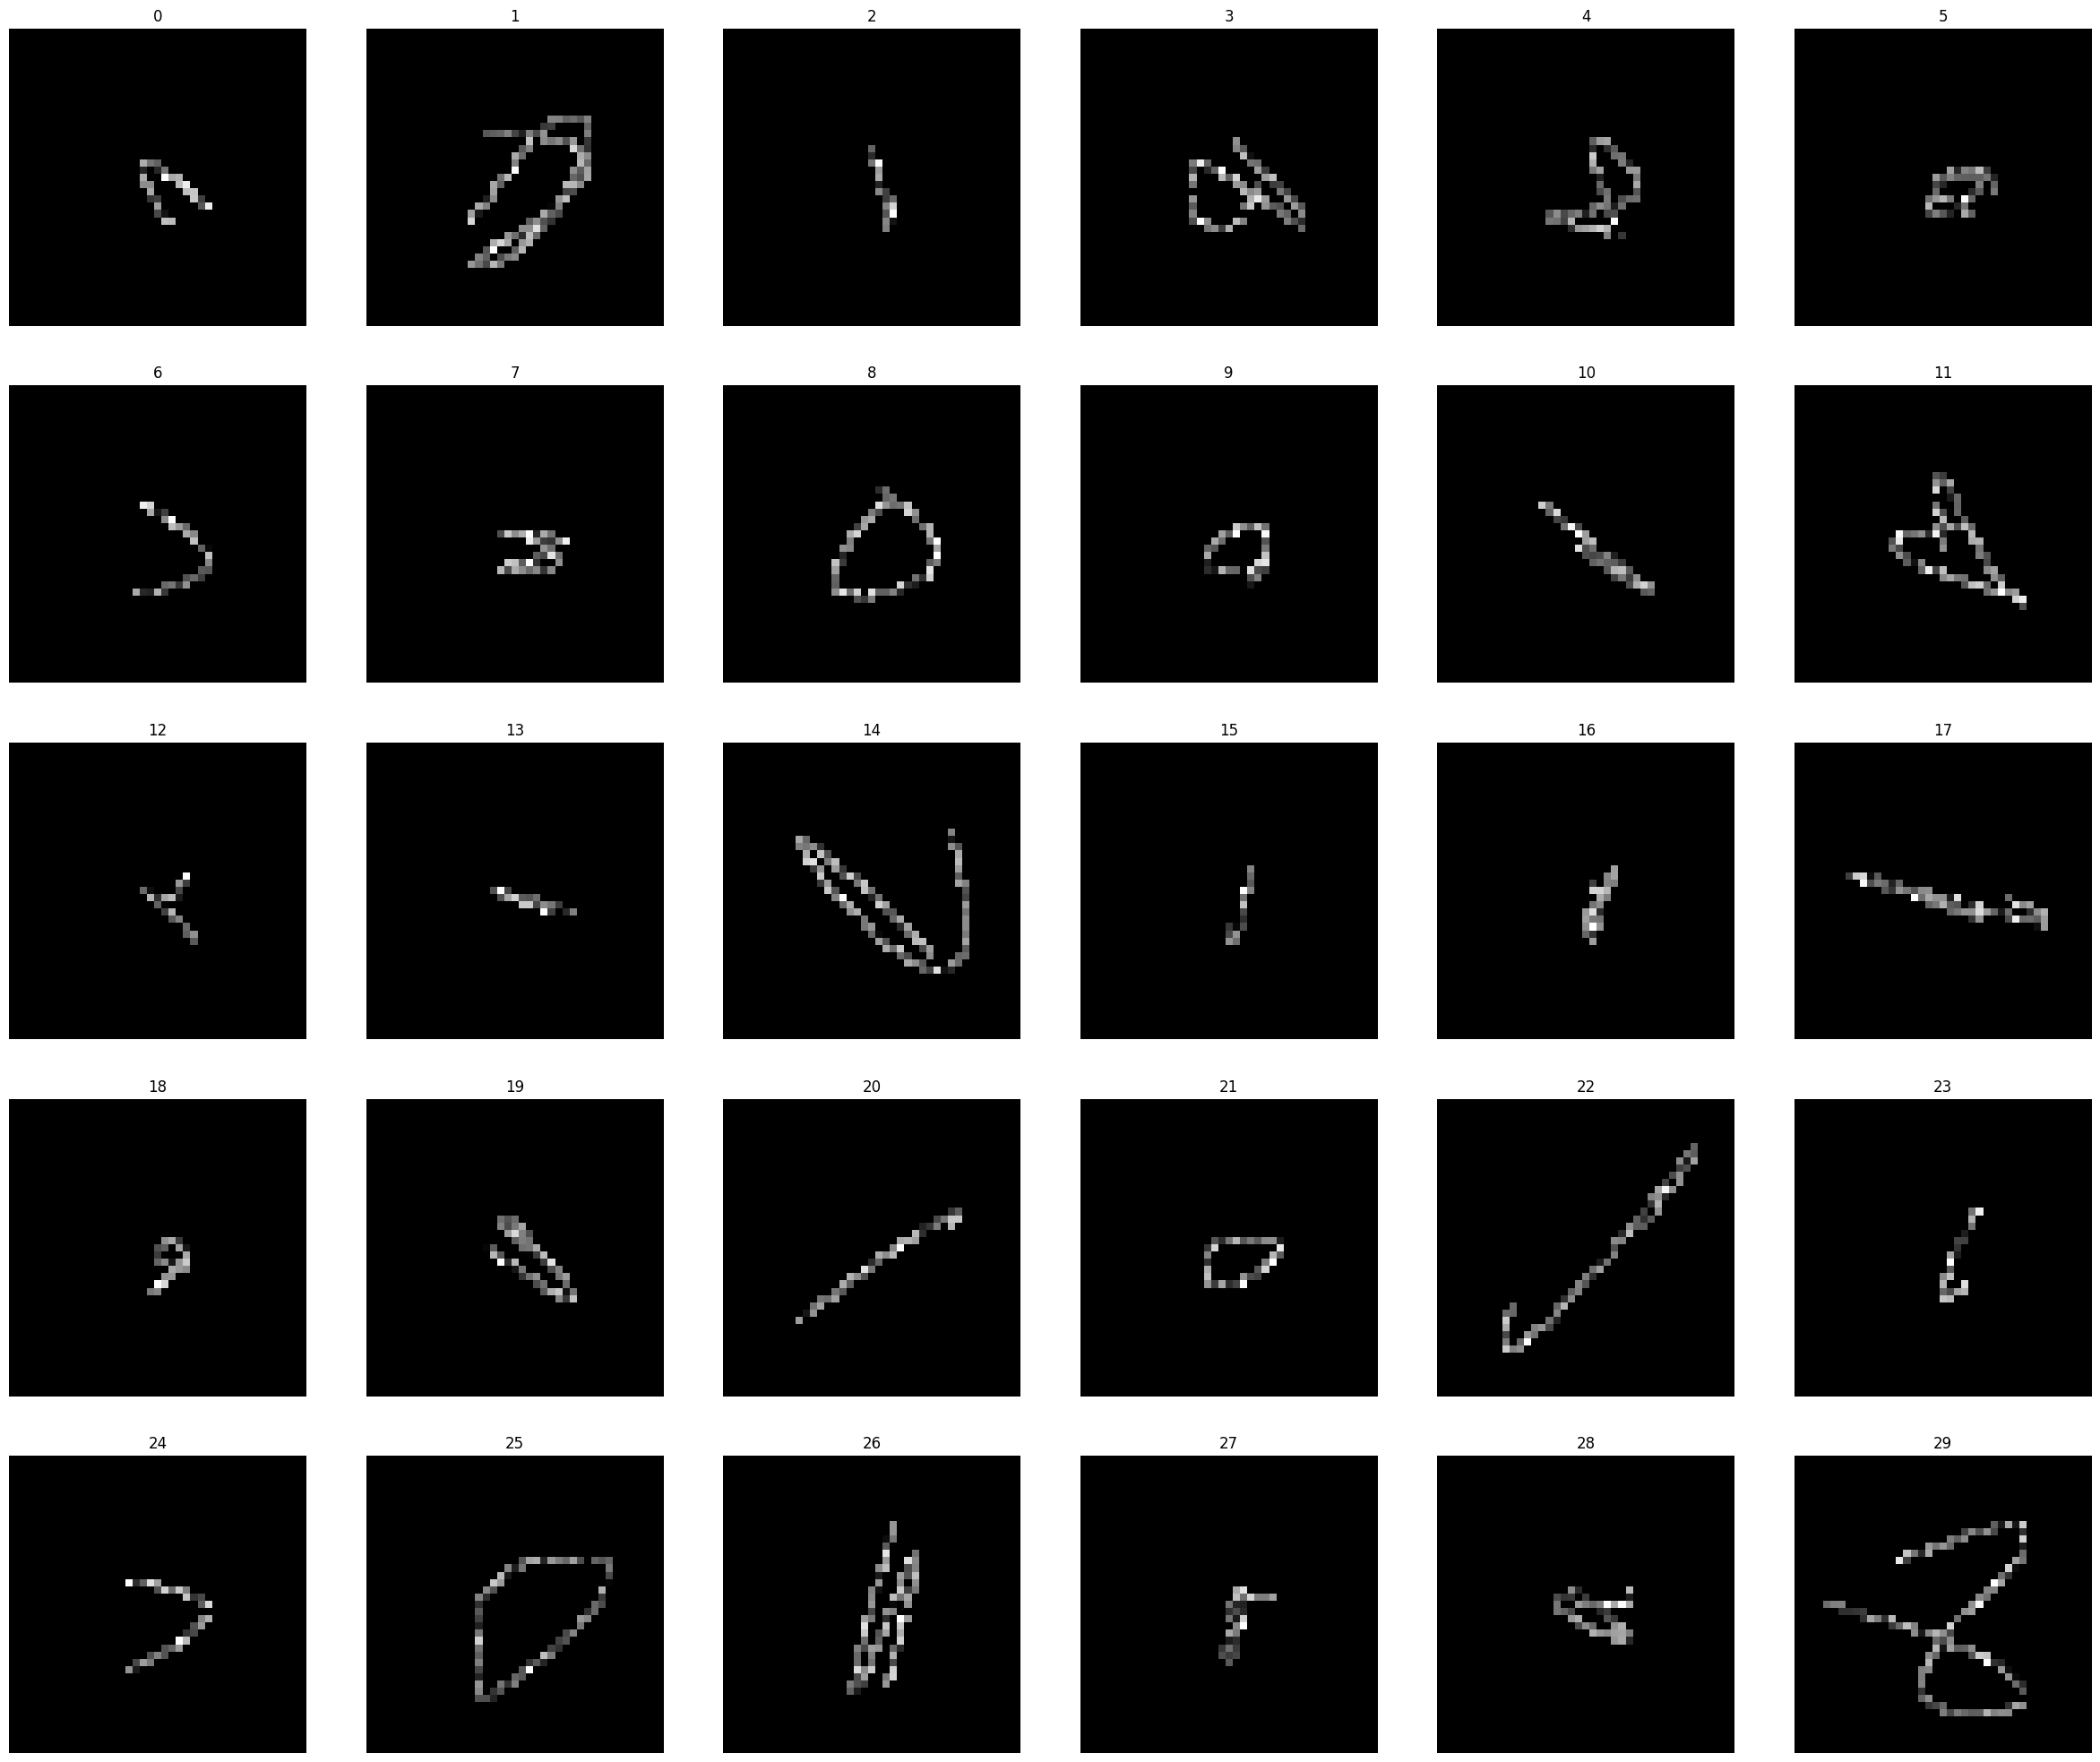

In [16]:
n = len(files)
total_cnt += n

plt.gray()
fig, axs = plt.subplots(5, n // 5, figsize=(n, 5 * 5))
for i in range(5):
    for j in range(n // 5):
        data = np.load(str(files[i * n // 5 + j]), allow_pickle=True)
        psf = data.item()['psf']
        axs[i, j].imshow(psf)
        axs[i, j].axis('off')
        axs[i, j].set_title(str(i * n // 5 + j))

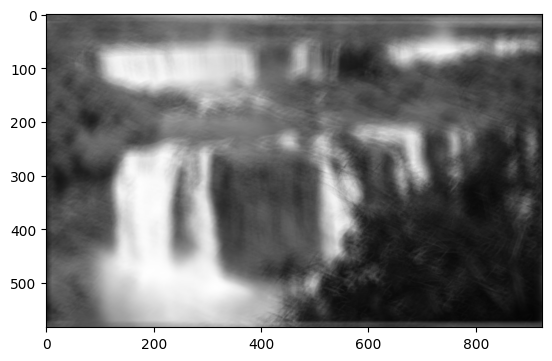

In [17]:
blurred = convolve(image, psf)
plt.imshow(blurred)
plt.show()

In [18]:
psf.shape

(41, 41)

In [19]:
print(f'In total: {total_cnt} motion blur kernels')

In total: 46 motion blur kernels


# 2 Gauss

In [20]:
total_cnt = 0

In [21]:
files = list(Path('../datasets/kernels/gauss-blur/processed/synthetic').rglob('*.npy'))

<Figure size 640x480 with 0 Axes>

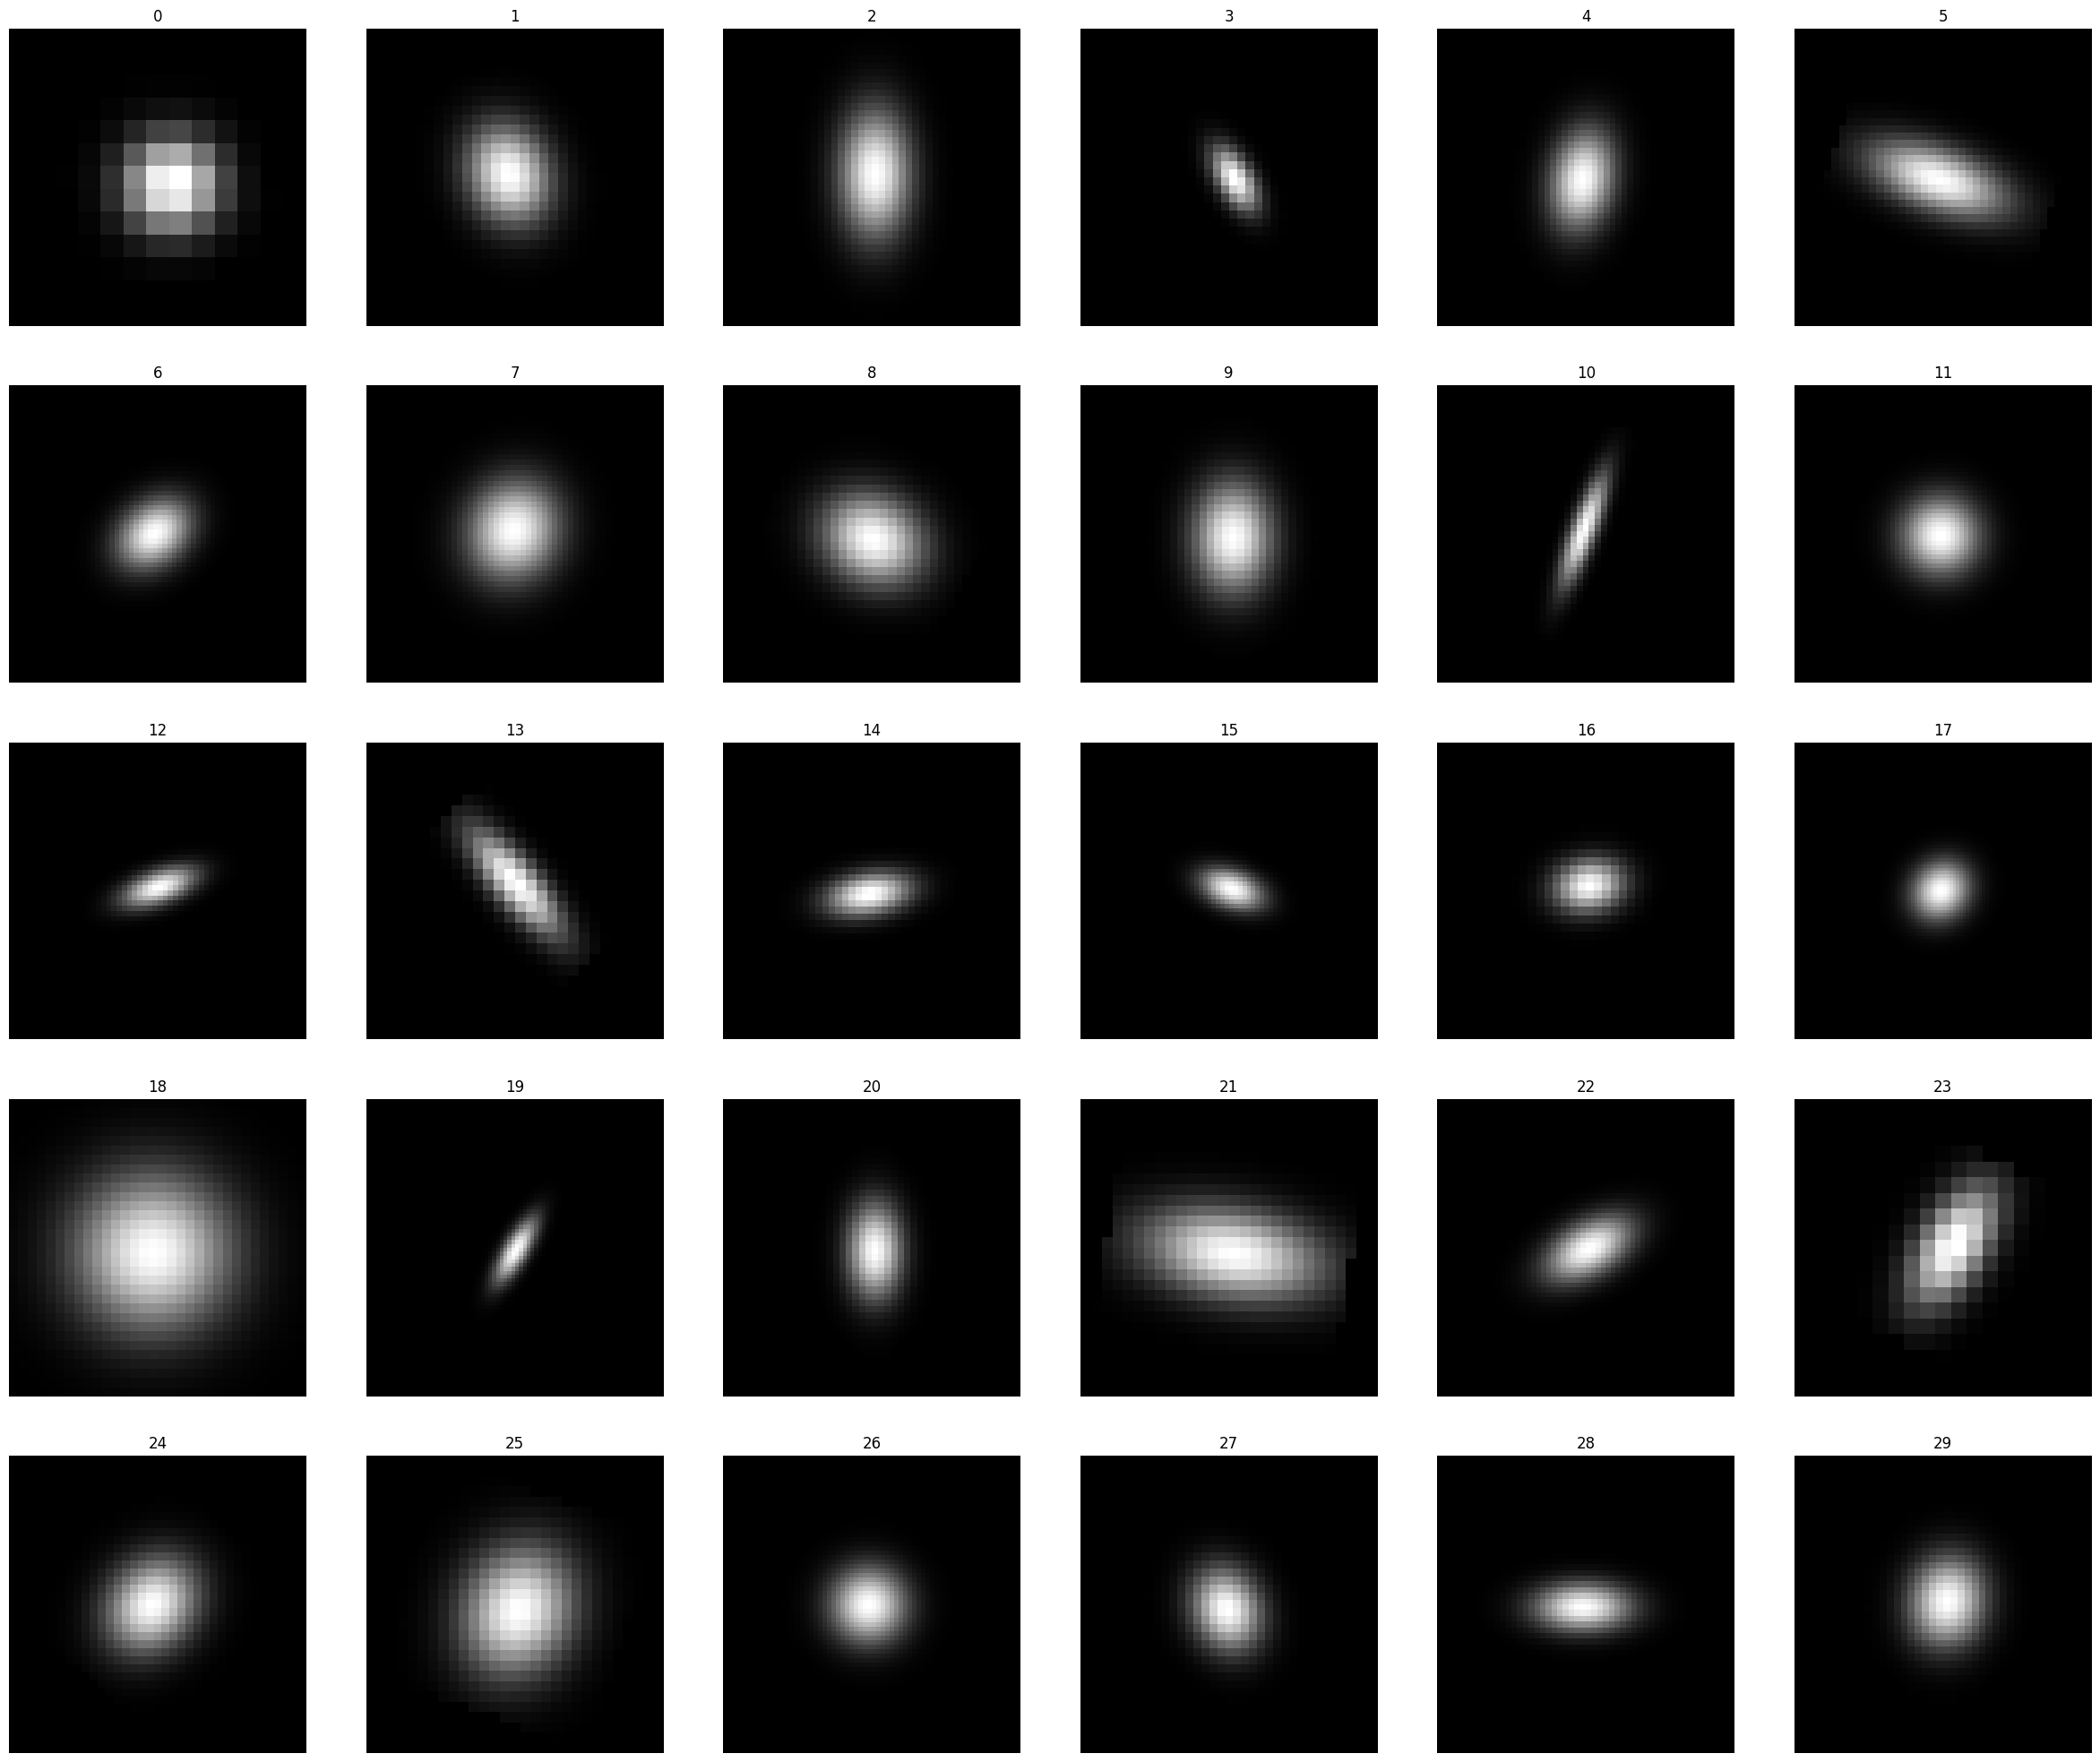

In [22]:
n = len(files)
total_cnt += n

plt.gray()
fig, axs = plt.subplots(5, n // 5, figsize=(n, 5 * 5))
for i in range(5):
    for j in range(n // 5):
        data = np.load(str(files[i * n // 5 + j]), allow_pickle=True).item()
        psf = data['psf']
        axs[i, j].imshow(psf)
        axs[i, j].axis('off')
        axs[i, j].set_title(str(i * n // 5 + j))

In [23]:
psf.shape

(42, 42)

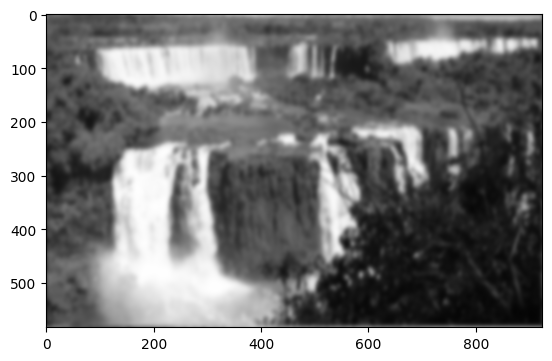

In [24]:
blurred = convolve(image, psf)
plt.imshow(blurred)
plt.show()

In [25]:
print(f'In total: {total_cnt} gauss blur kernels')

In total: 30 gauss blur kernels


## 3 Eye PSF (optics)

### Small

In [26]:
files = sorted(list(Path('../datasets/kernels/eye-psf/processed/synthetic').rglob('small-psf-*.npy')))

<Figure size 640x480 with 0 Axes>

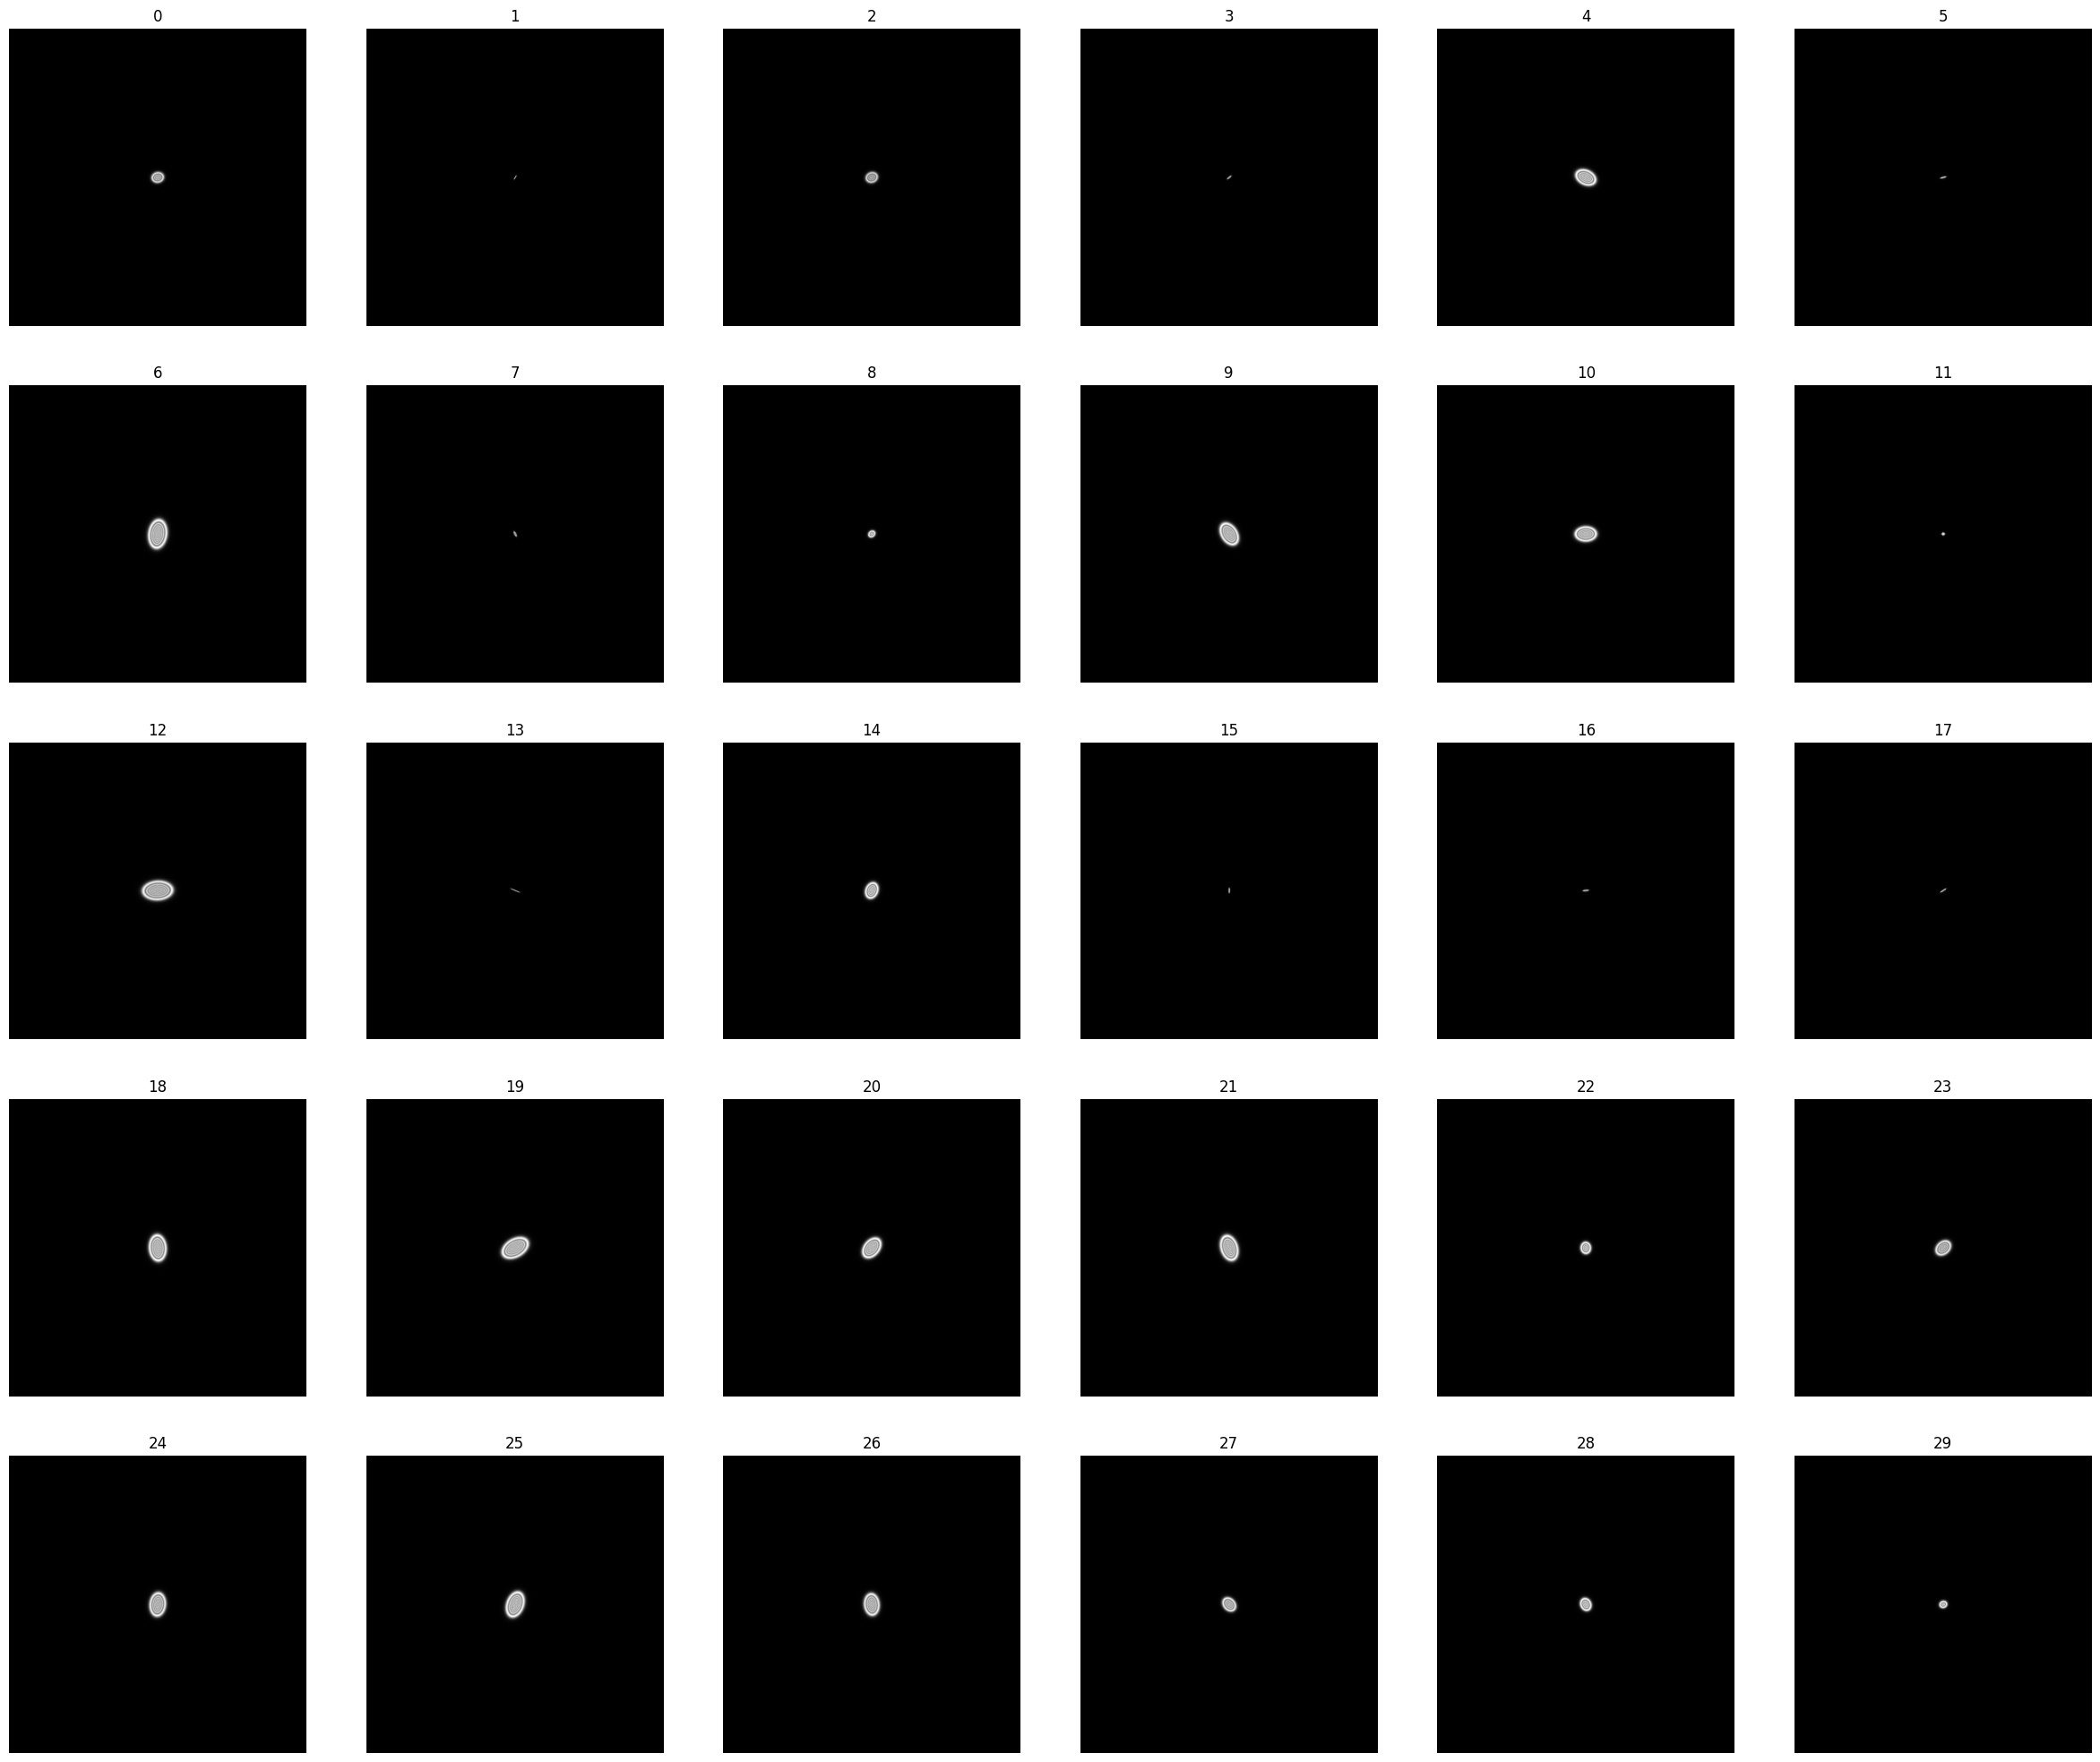

In [27]:
n = len(files)
total_cnt += n

plt.gray()
fig, axs = plt.subplots(5, n // 5, figsize=(n, 5 * 5))
for i in range(5):
    for j in range(n // 5):
        data = np.load(str(files[i * n // 5 + j]), allow_pickle=True)
        psf = data.item()['psf']
        axs[i, j].imshow(psf)
        axs[i, j].axis('off')
        axs[i, j].set_title(str(i * n // 5 + j))

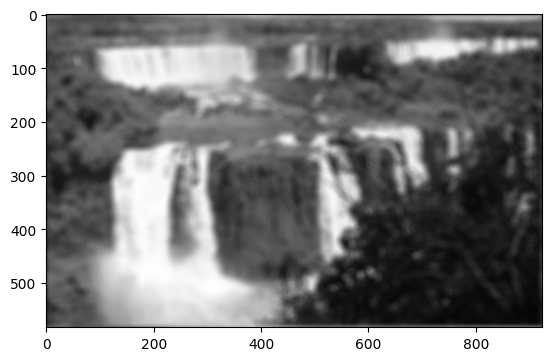

In [28]:
blurred = convolve(image, psf)
plt.imshow(blurred)
plt.show()

### Medium

In [29]:
files = sorted(list(Path('../datasets/kernels/eye-psf/processed/synthetic').rglob('medium-psf-*.npy')))

<Figure size 640x480 with 0 Axes>

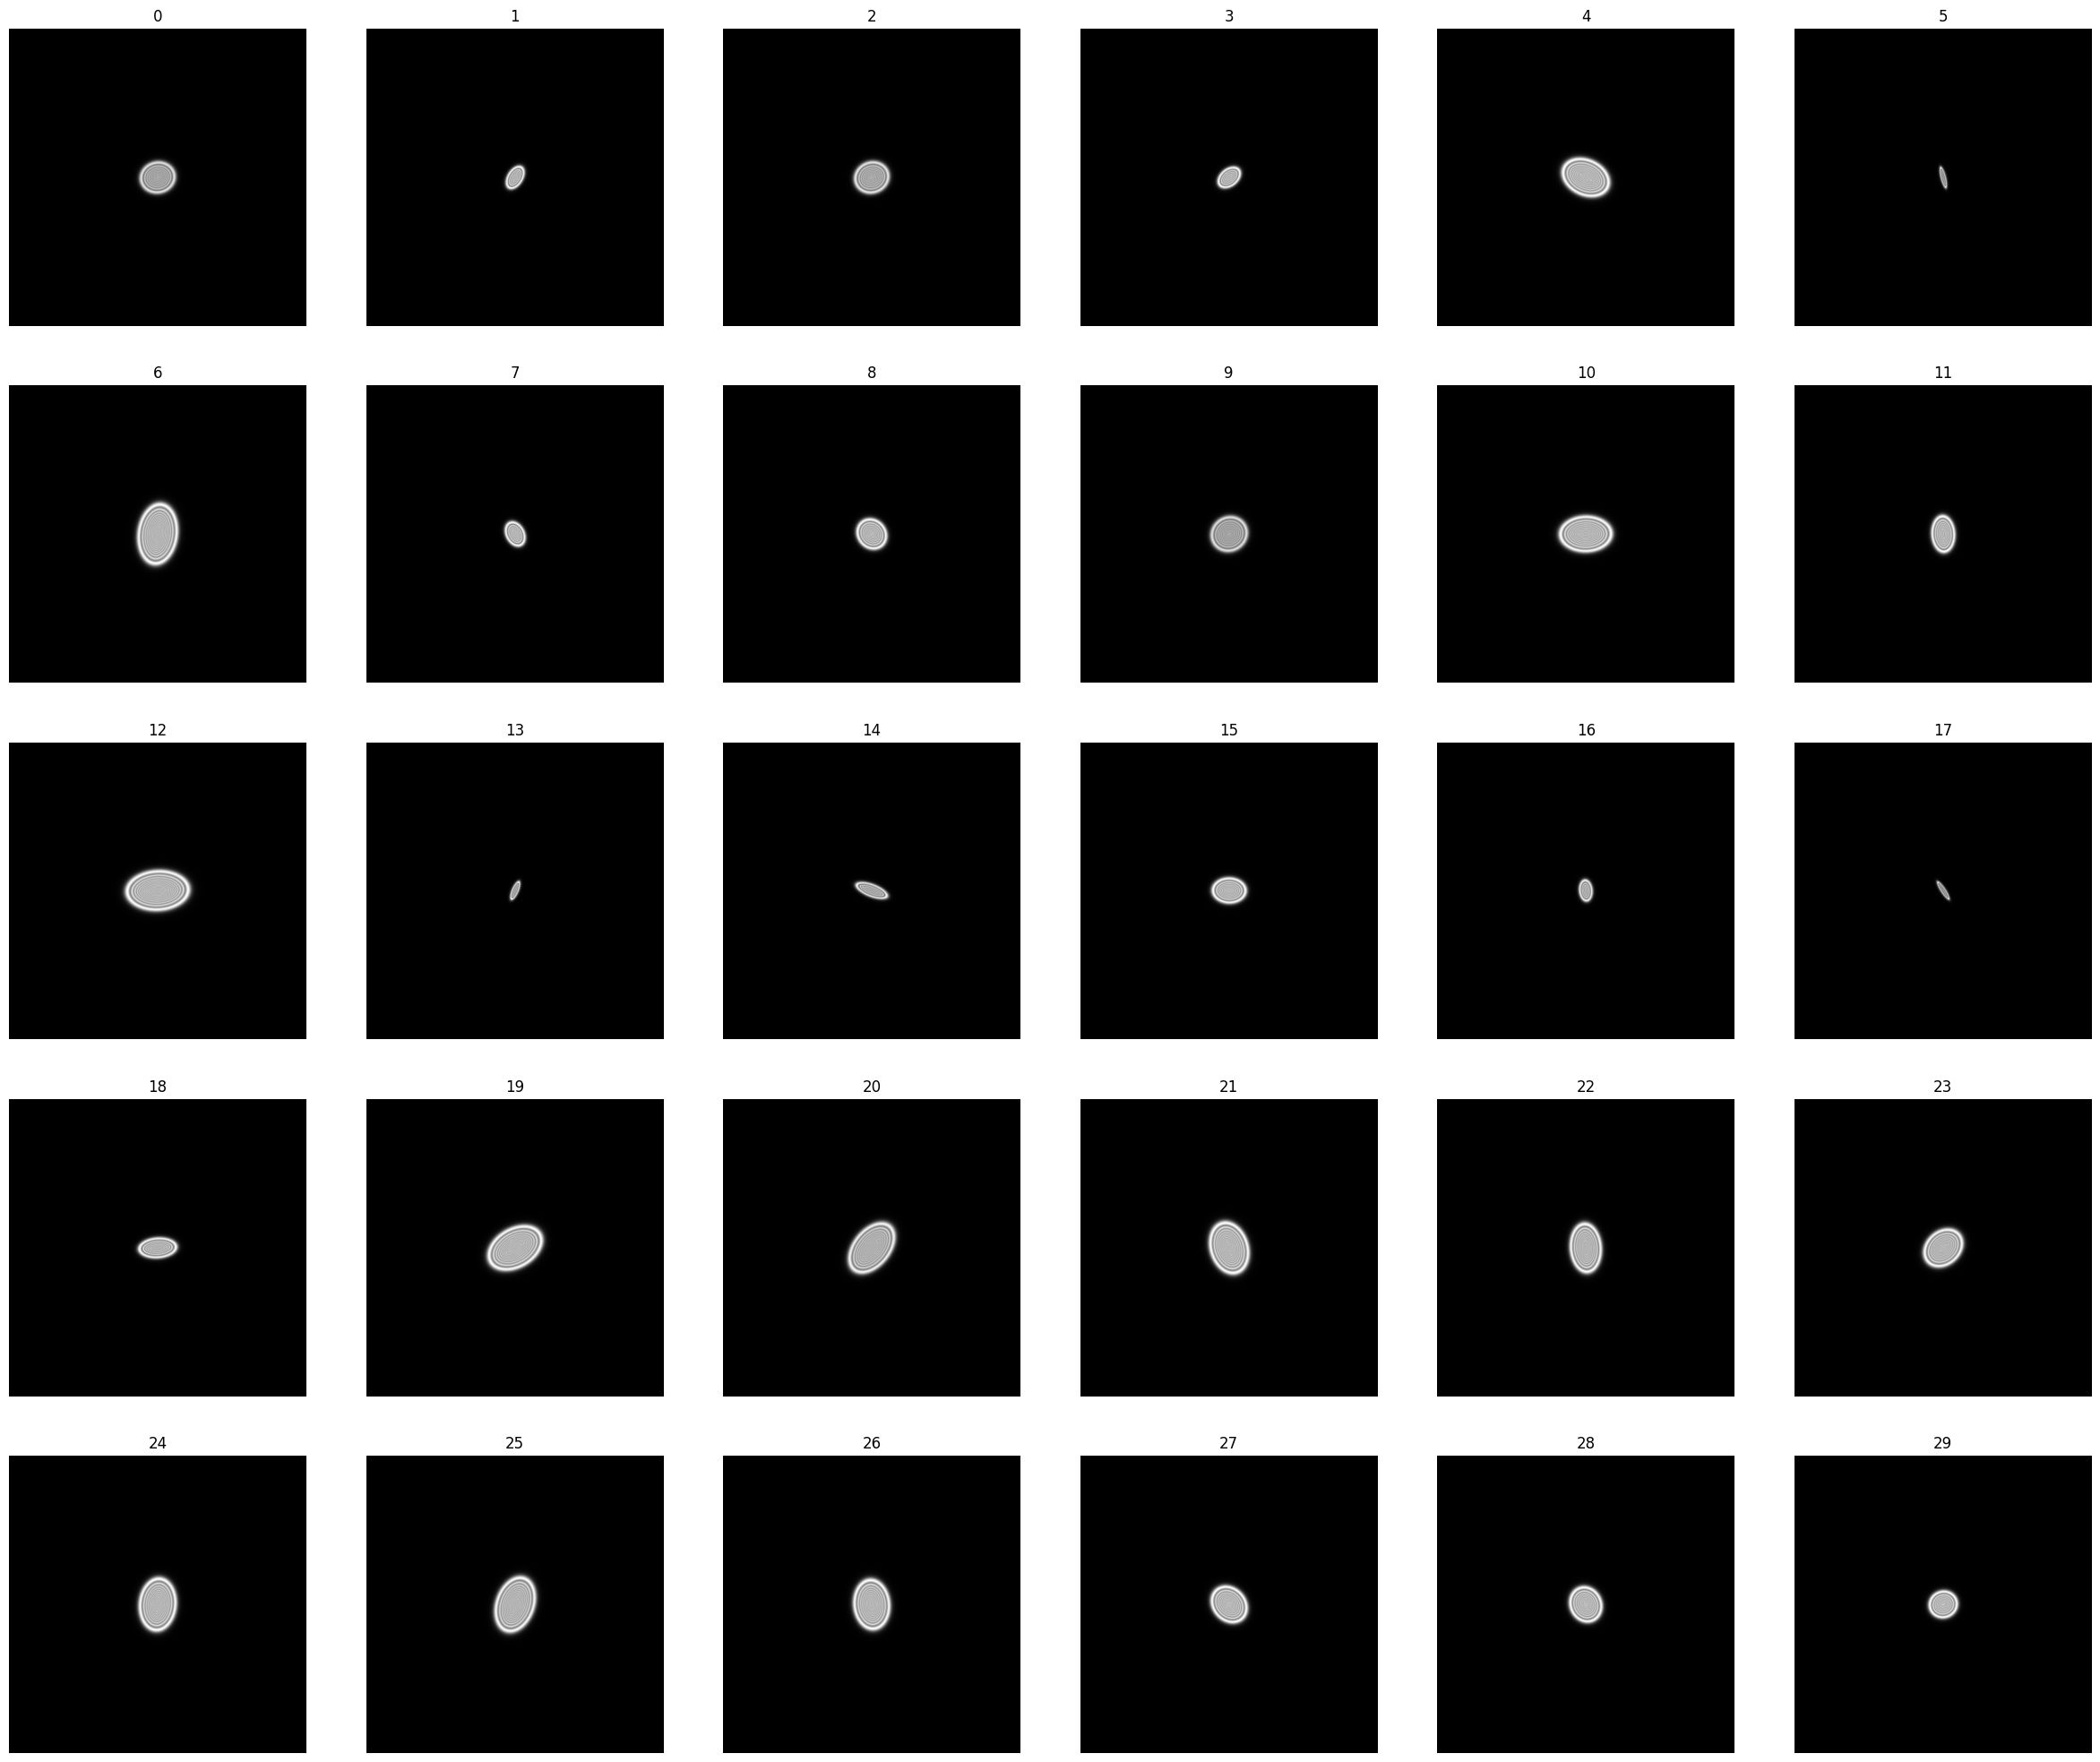

In [30]:
n = len(files)
total_cnt += n

plt.gray()
fig, axs = plt.subplots(5, n // 5, figsize=(n, 5 * 5))
for i in range(5):
    for j in range(n // 5):
        data = np.load(str(files[i * n // 5 + j]), allow_pickle=True)
        psf = data.item()['psf']
        axs[i, j].imshow(psf)
        axs[i, j].axis('off')
        axs[i, j].set_title(str(i * n // 5 + j))

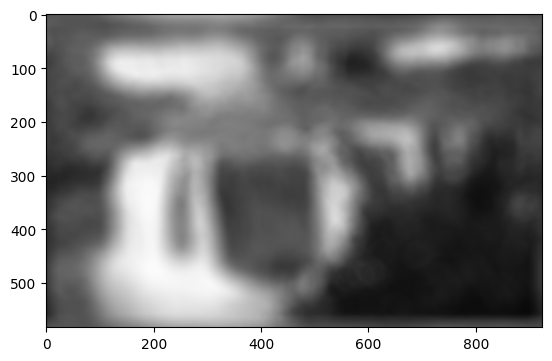

In [31]:
blurred = convolve(image, psf)
plt.imshow(blurred)
plt.show()

### Big

In [32]:
files = sorted(list(Path('../datasets/kernels/eye-psf/processed/synthetic').rglob('big-psf-*.npy')))

<Figure size 640x480 with 0 Axes>

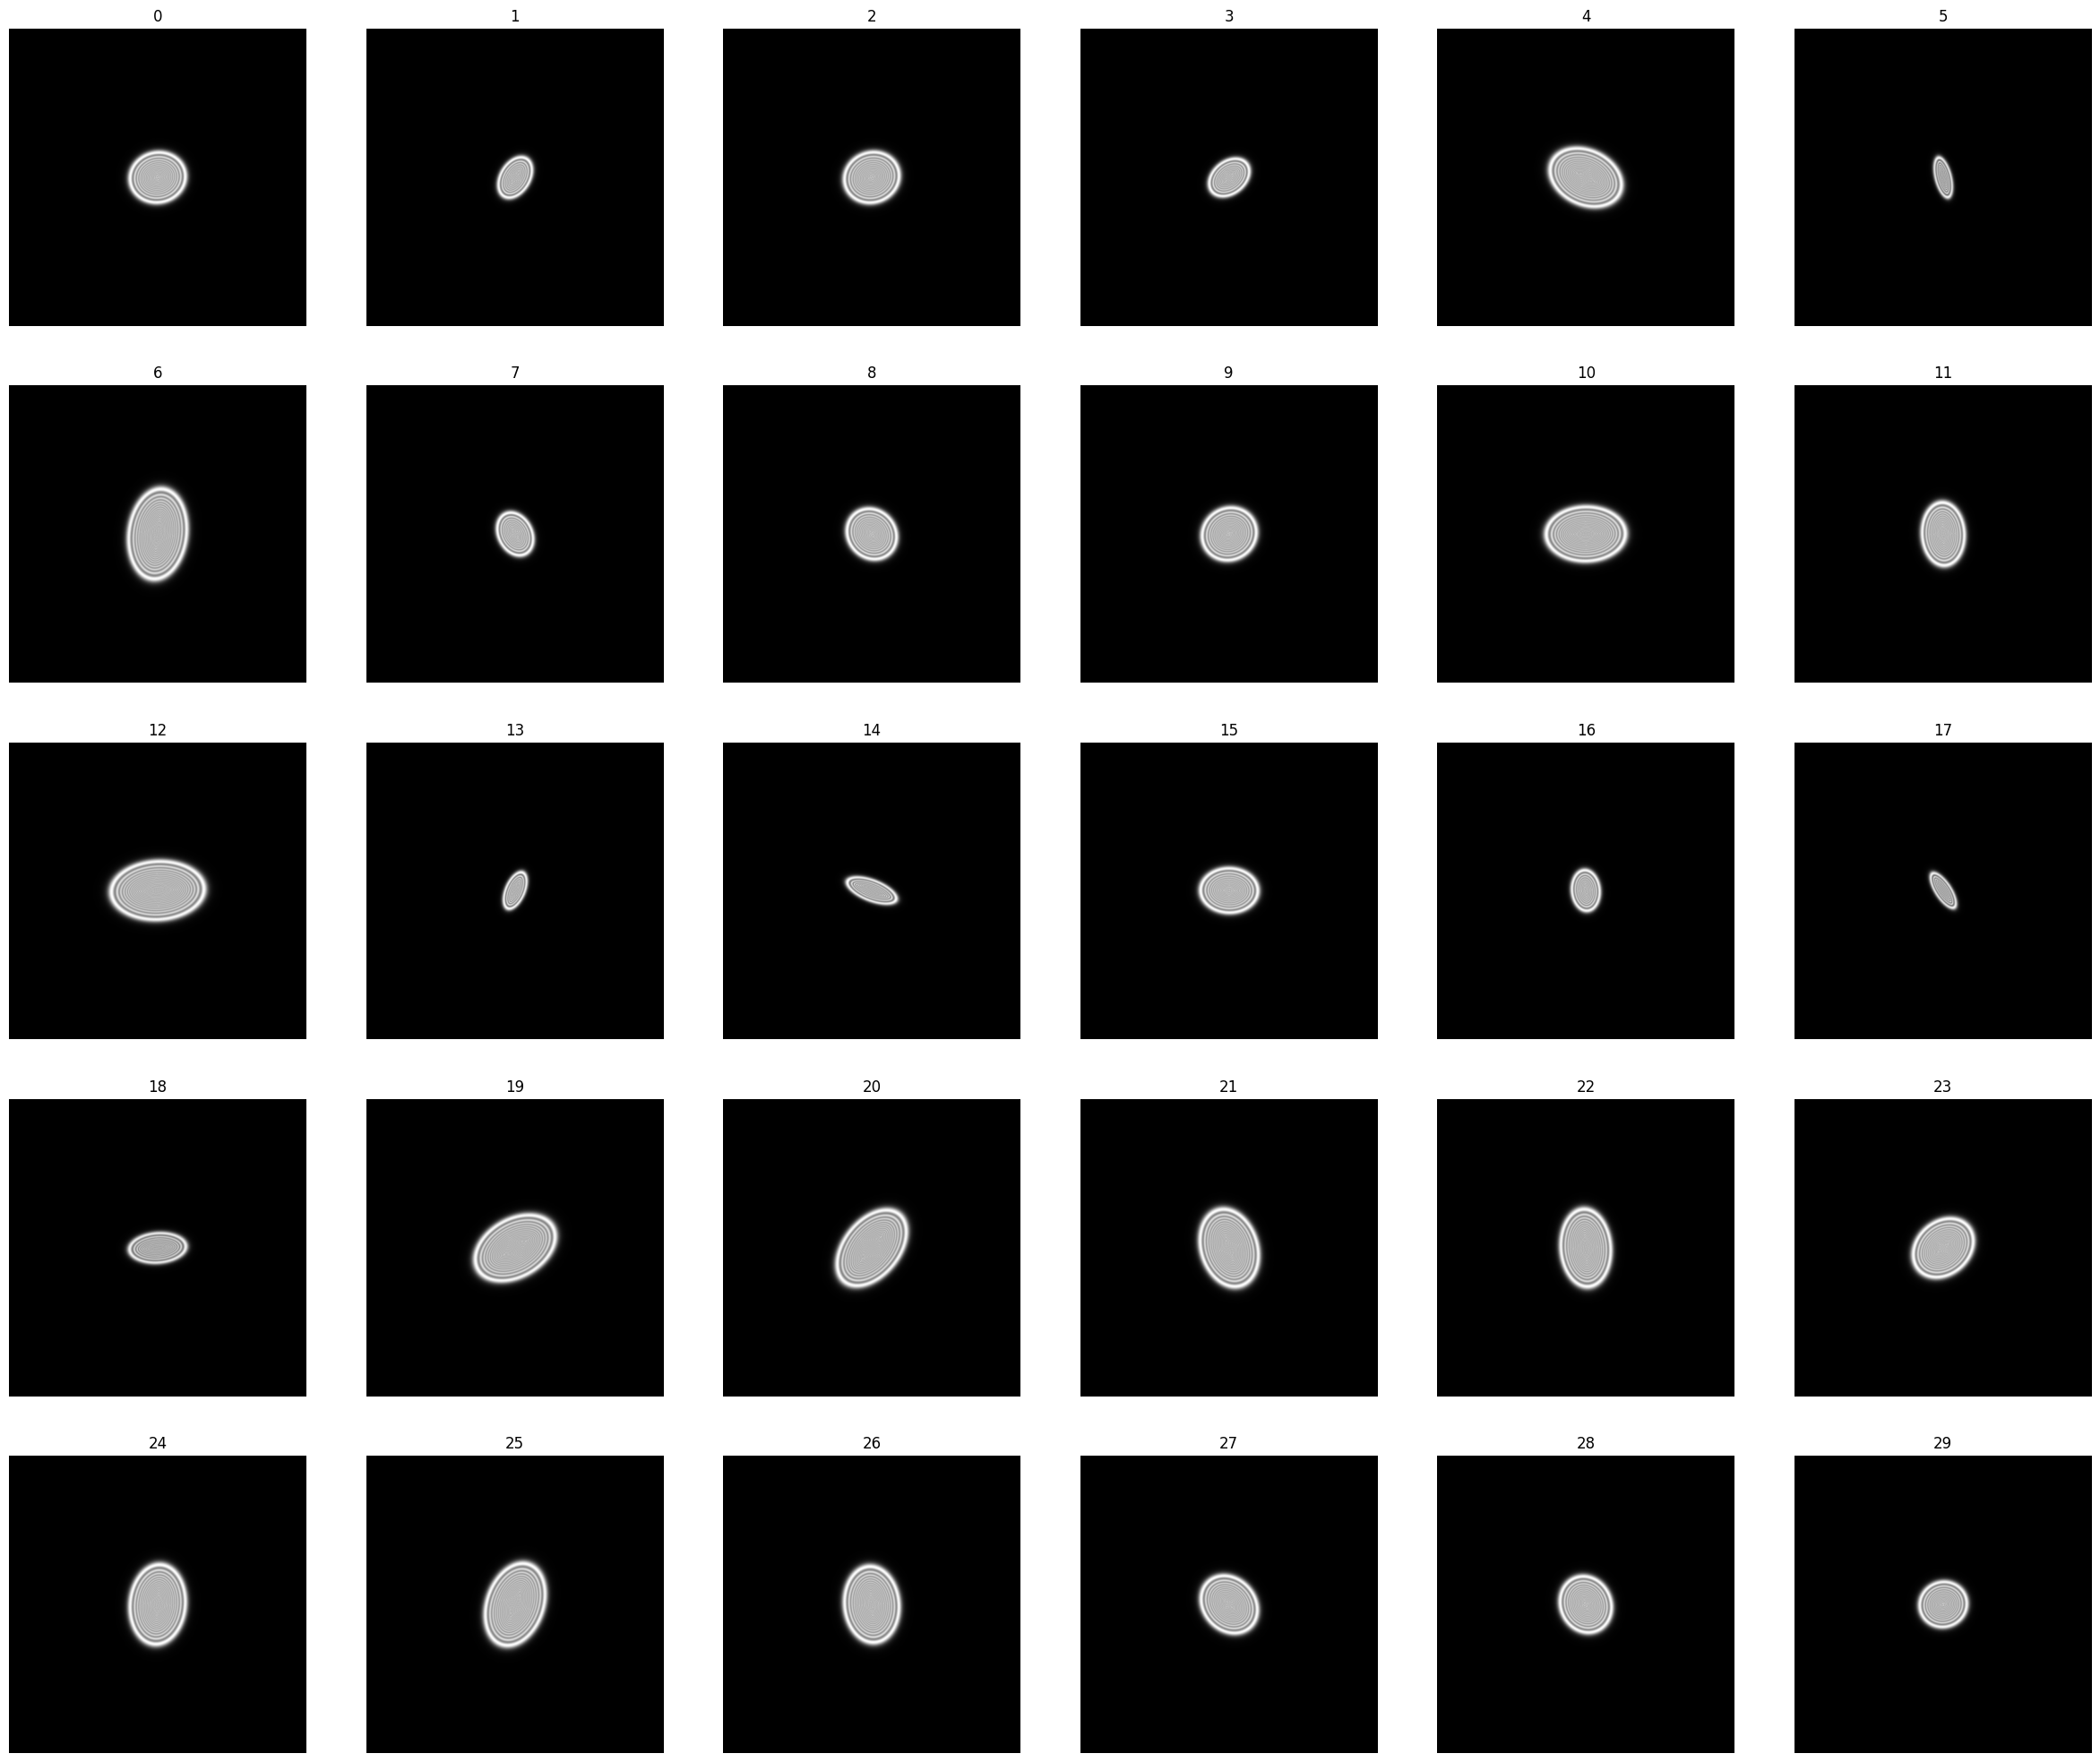

In [33]:
n = len(files)
total_cnt += n

plt.gray()
fig, axs = plt.subplots(5, n // 5, figsize=(n, 5 * 5))
for i in range(5):
    for j in range(n // 5):
        data = np.load(str(files[i * n // 5 + j]), allow_pickle=True)
        psf = data.item()['psf']
        axs[i, j].imshow(psf)
        axs[i, j].axis('off')
        axs[i, j].set_title(str(i * n // 5 + j))

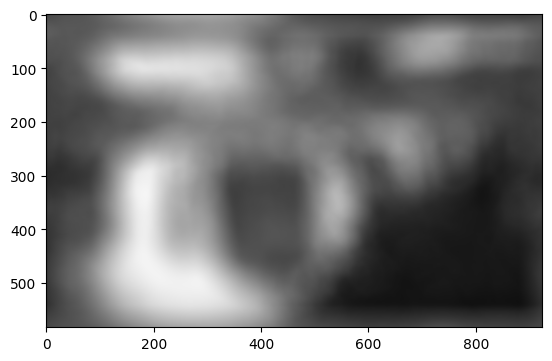

In [34]:
blurred = convolve(image, psf)
plt.imshow(blurred)
plt.show()